# Plot sector contributions and multi-year trend

In [2]:
import os
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

### Load and combine yearly inventories

In [12]:
from_year = 2019
to_year = 2024
base_filename = 'Munich_GHGco_v2_year'#2019.gpkg

inventory = pd.DataFrame()
for y in range(from_year, to_year + 1):
    gdf = gpd.read_file(os.path.join(os.path.dirname(os.path.abspath('')),
                                     'output', str(y), f'{base_filename}{y}.gpkg'))
    gdf_sum = gdf.groupby('GNFR_Sector').sum(numeric_only=True)
    
    # combine sectors
    gdf_sum.loc['Human. Resp.'] = list(gdf_sum.loc[['HR_nonresidential', 'HR_outdoor', 'HR_residential']].sum(axis=0))
    gdf_sum.loc['F'] = list(gdf_sum.loc[['F_hot', 'F_csee']].sum(axis=0))
    gdf_sum.loc['Other'] = list(gdf_sum.loc[['D', 'E', 'G', 'J', 'K', 'L', 'I']].sum(axis=0))
    
    gdf_sum['Year'] = y
    inventory = pd.concat([inventory, gdf_sum])

inventory.drop('id', axis=1, inplace=True)
inventory.reset_index(inplace=True)
inventory.set_index(['Year', 'GNFR_Sector'], inplace=True)

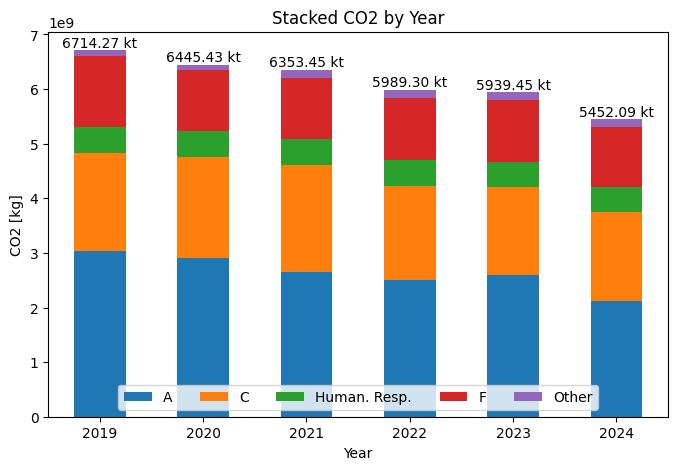

In [26]:
# Parameters
selected_sectors = ['A', 'C', 'F', 'Human. Resp.', 'Other']
column_to_plot = 'CO2'

# Filter DataFrame
df_filtered = inventory.loc[inventory.index.get_level_values('GNFR_Sector').isin(selected_sectors)]

# Pivot so that sectors become columns
df_pivot = df_filtered[column_to_plot].unstack(level='GNFR_Sector')

# Plot stacked barplot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(8,5))
ax.set_ylabel(f'{column_to_plot} [kg]')
ax.set_title(f'Stacked {column_to_plot} by Year')
plt.xticks(rotation=0)

# add total to the top of each bar
totals = df_pivot.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total, f'{total*1e-6:.2f} kt', ha='center', va='bottom')

plt.legend(ncol=5, loc = 'lower center')
plt.show()

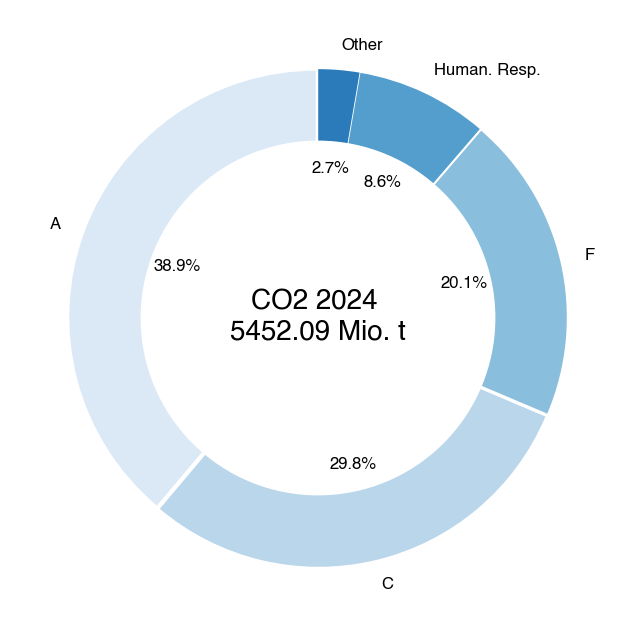

In [21]:
pollutant = 'CO2'
YEAR = 2024
sectors = ['A', 'C', 'F', 'Human. Resp.', 'Other']

sector_totals = inventory.loc[YEAR][pollutant].loc[sectors].to_dict()


# make donut pie chart
fig, ax = plt.subplots(figsize = (8,8))
explode = (0.01,0.01,0.01,0.01,0.01)
ax.pie(sector_totals.values(), labels=sector_totals.keys(), autopct='%1.1f%%',
       startangle=90, explode = explode, colors = sns.color_palette('Blues'))

#draw circle in center
centre_circle = plt.Circle((0,0),0.72,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Change font of pie chart to helvetica, 12
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 12})

# add total emissions to plot
plt.text(0, 0, f'{pollutant} {YEAR} \n{sum(sector_totals.values())*1e-6:.2f} Mio. t', fontsize=20, ha='center', va='center')

plt.show()


,CO2,NOX,CO,CH4,PM,CO2_bio
GNFR_Sector,,,,,,
A,3.033400e+09,1.989800e+06,1.698410e+05,0.000000e+00,0.000000,0.000000e+00
C,1.796316e+09,6.831349e+05,3.949544e+05,7.937231e+04,4449.361053,0.000000e+00
D,2.038039e+05,0.000000e+00,0.000000e+00,1.736932e+06,0.000000,0.000000e+00
E,3.309051e+07,3.717335e+03,2.262882e+05,0.000000e+00,0.000000,0.000000e+00
F_csee,2.353394e+07,6.415991e+04,1.549228e+06,1.498703e+04,1758.204745,1.070205e+06
F_hot,1.287339e+09,3.333483e+06,2.583264e+06,4.708858e+04,43113.464700,6.236111e+07
G,2.377996e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
HR_nonresidential,9.441249e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,9.441249e+07
HR_outdoor,4.694127e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.694127e+07
